In [4]:
from pathlib import Path
import os
import sys

sys.path.append(str(Path(os.getcwd()).parents[1]))
from Helper_Functions import common_utils
directory_to_extract_to = os.getcwd()

common_utils.load_data_from_one_drive(directory_to_extract_to, "clustering_paths", "customer_interest_segementation")

Extracting : 100%|██████████| 1/1 [00:00<00:00, 11.81it/s]


In [3]:
#Importing the Libraries
import numpy as np
import pandas as pd
import datetime
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_score ,calinski_harabasz_score, davies_bouldin_score
from sklearn.cluster import KMeans, AgglomerativeClustering
from kmodes.kmodes import KModes
import matplotlib.pyplot as plt, numpy as np
import plotly.graph_objs as go
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering
from matplotlib.colors import ListedColormap
from sklearn import metrics
import warnings
import sys
import re
import json
import shutil
import string
from termcolor import colored
from tqdm import tqdm
from itertools import chain
from collections import defaultdict
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go 
from plotly import tools
import plotly.figure_factory as ff

In [6]:
data = pd.read_csv("kaggle_Interests_group.csv")
data.head()

,group,grand_tot_interests,interest1,interest2,interest3,interest4,interest5,interest6,interest7,interest8,...,interest208,interest209,interest210,interest211,interest212,interest213,interest214,interest215,interest216,interest217
0,C,17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,C,43,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,1.0,NaN
2,C,27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,1.0,NaN
3,C,34,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,1.0,NaN
4,C,36,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,1.0,NaN


In [ ]:
data['group'].isnull().values.any()


False

In [ ]:
data['grand_tot_interests'].isnull().values.any()

False

In [ ]:
for i in data.columns:
  data[i].replace({2:1,np.nan:0}, inplace=True)

In [ ]:
for i in data.columns:
  print(data[i].unique())

['C' 'P' 'R' 'I']
[ 17  43  27  34  36   6  54   1  29  44  39  28  47  38  37  11  71  48
   4  60  23  24  45  30  51  22   8  10  57  26  41  13  46  31  25  62
  32  56  42  49  55   3  66  58  21  70  35  61  40  63  69  52  59  50
  33   9  53  65  64  18  15  20  19  16  81  75  14  12  73  97   7  76
  74   5  68  89  67  80 104  84  82  77  72  99]
[0. 1.]
[0. 1.]
[0. 1.]
[0. 1.]
[0. 1.]
[0. 1.]
[0. 1.]
[0. 1.]
[0. 1.]
[0. 1.]
[0. 1.]
[1. 0.]
[0. 1.]
[0. 1.]
[0. 1.]
[1. 0.]
[0. 1.]
[0. 1.]
[0. 1.]
[0. 1.]
[1. 0.]
[0. 1.]
[0. 1.]
[0. 1.]
[0. 1.]
[0. 1.]
[0. 1.]
[0. 1.]
[0. 1.]
[0. 1.]
[0. 1.]
[0. 1.]
[0. 1.]
[0. 1.]
[0. 1.]
[0. 1.]
[0. 1.]
[0. 1.]
[0. 1.]
[0. 1.]
[0. 1.]
[0. 1.]
[0. 1.]
[0. 1.]
[0. 1.]
[0. 1.]
[1. 0.]
[0. 1.]
[0. 1.]
[0. 1.]
[0. 1.]
[0. 1.]
[0. 1.]
[0. 1.]
[0. 1.]
[0. 1.]
[1. 0.]
[1. 0.]
[1. 0.]
[0. 1.]
[1. 0.]
[0. 1.]
[0. 1.]
[1. 0.]
[0. 1.]
[1. 0.]
[0. 1.]
[0. 1.]
[0. 1.]
[0. 1.]
[0. 1.]
[0. 1.]
[0. 1.]
[0. 1.]
[0. 1.]
[0. 1.]
[0. 1.]
[0. 1.]
[0. 1.]
[1. 0.]


In [ ]:
title_mapping = {"P": 0, "C": 1, "R": 2,  "I": 3 }
data['group'] = data['group'].map(title_mapping)

In [ ]:
data.head()

,group,grand_tot_interests,interest1,interest2,interest3,interest4,interest5,interest6,interest7,interest8,...,interest208,interest209,interest210,interest211,interest212,interest213,interest214,interest215,interest216,interest217
0,1,17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,43,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2,1,27,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
3,1,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
4,1,36,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


##Until this point we have all the data in numeric format. Hurray!!! :)

In [ ]:
data['group_total'] = data.sum(axis=1) - data['grand_tot_interests'] - data['group']

In [ ]:
data.loc[data['group_total'] != data['grand_tot_interests']]


,group,grand_tot_interests,interest1,interest2,interest3,interest4,interest5,interest6,interest7,interest8,...,interest209,interest210,interest211,interest212,interest213,interest214,interest215,interest216,interest217,group_total
7,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
8,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
27,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
39,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
40,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5943,3,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
5947,3,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
6085,3,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
6136,3,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0


In [ ]:
data.drop("grand_tot_interests",  axis=1, inplace=True)

In [ ]:
data.head()

,group,interest1,interest2,interest3,interest4,interest5,interest6,interest7,interest8,interest9,...,interest209,interest210,interest211,interest212,interest213,interest214,interest215,interest216,interest217,group_total
0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17.0
1,1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,43.0
2,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,27.0
3,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,34.0
4,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,36.0


In [ ]:
data['group'].value_counts()

3    1809
0    1731
1    1725
2    1075
Name: group, dtype: int64

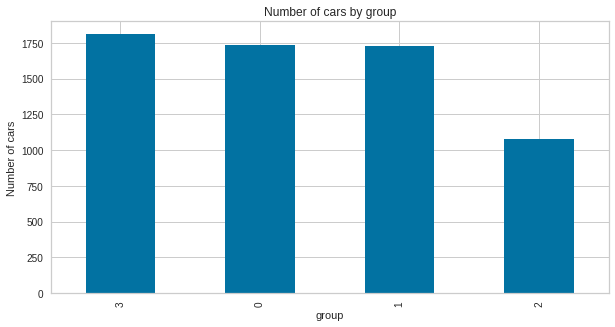

In [ ]:
data.group.value_counts().nlargest(40).plot(kind='bar', figsize=(10,5))
plt.title("Number of cars by group")
plt.ylabel('Number of cars')
plt.xlabel('group');

In [ ]:
# scaler = StandardScaler()
# scaler.fit(data)
# scaled_data = pd.DataFrame(scaler.transform(data),columns= data.columns)

In [ ]:
# pca = PCA(n_components=3)
# pca.fit(scaled_data)
# PCA_ds = pd.DataFrame(pca.transform(scaled_data), columns=(["col1","col2", "col3"]))

In [ ]:
# PCA_ds

In [ ]:
print('Elbow Method to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(KModes(), k=10)
Elbow_M.fit(data)
Elbow_M.show()

Elbow Method to determine the number of clusters to be formed:


KeyboardInterrupt: ignored

Elbow Method to determine the number of clusters to be formed:


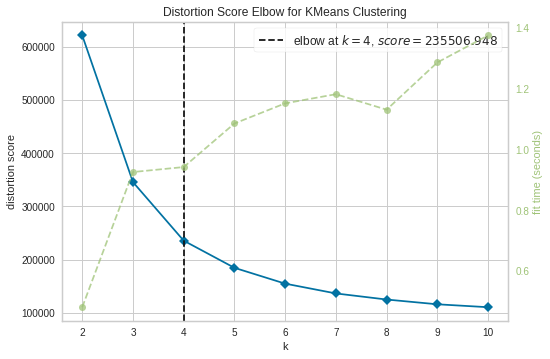

In [ ]:
print('Elbow Method to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(data)
Elbow_M.show()

In [ ]:
# clf = KModes(n_clusters=3, init='Huang', n_init=5, verbose=0, random_state=0)
# labels = clf.fit_predict(PCA_ds)

In [ ]:
# data = data.drop('group_total', axis=1)

In [ ]:
# https://scikit-learn.org/stable/modules/clustering.html#davies-bouldin-index

In [ ]:
# https://scikit-learn.org/stable/modules/clustering.html#calinski-harabasz-index

In [ ]:
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(data)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(data, cluster_labels)
    calinski_avg = calinski_harabasz_score(data, cluster_labels)
    david_avg = davies_bouldin_score(data, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg)) #closer to 1 the better the cluster
    print("For n_clusters={0}, the calinski_harabasz_score is {1}".format(num_clusters, calinski_avg)) # larger the score, better the cluster
    print("For n_clusters={0}, the davies_bouldin_score is {1}\n\n".format(num_clusters, david_avg)) #closer to 0 the better the cluster

For n_clusters=2, the silhouette score is 0.5251885511422125
For n_clusters=2, the calinski_harabasz_score is 10650.480329850097
For n_clusters=2, the davies_bouldin_score is 0.6607389543359239


For n_clusters=3, the silhouette score is 0.44665028460356676
For n_clusters=3, the calinski_harabasz_score is 12156.749678333155
For n_clusters=3, the davies_bouldin_score is 0.7081100157009664


For n_clusters=4, the silhouette score is 0.40405830370477014
For n_clusters=4, the calinski_harabasz_score is 12889.448369012383
For n_clusters=4, the davies_bouldin_score is 0.7586949870256593


For n_clusters=5, the silhouette score is 0.36025308971660014
For n_clusters=5, the calinski_harabasz_score is 12796.250726389166
For n_clusters=5, the davies_bouldin_score is 0.8308576510500023


For n_clusters=6, the silhouette score is 0.326436302195873
For n_clusters=6, the calinski_harabasz_score is 12422.524070567659
For n_clusters=6, the davies_bouldin_score is 0.925655105600239


For n_clusters=7, t

In [ ]:
range_n_clusters = [2, 3, 4]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    clf = KModes(n_clusters=num_clusters, random_state=0)
    cluster_labels = clf.fit_predict(data)  
    
    #cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(data, cluster_labels)
    calinski_avg = calinski_harabasz_score(data, cluster_labels)
    david_avg = davies_bouldin_score(data, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg)) #closer to 1 the better the cluster
    print("For n_clusters={0}, the calinski_harabasz_score is {1}".format(num_clusters, calinski_avg)) # larger the score, better the cluster
    print("For n_clusters={0}, the davies_bouldin_score is {1}\n\n".format(num_clusters, david_avg)) #closer to 0 the better the cluster

For n_clusters=2, the silhouette score is 0.5098528176447155
For n_clusters=2, the calinski_harabasz_score is 9977.794852760575
For n_clusters=2, the davies_bouldin_score is 0.6724430516884985


For n_clusters=3, the silhouette score is 0.1678925630658723
For n_clusters=3, the calinski_harabasz_score is 4738.493807824798
For n_clusters=3, the davies_bouldin_score is 4.619479309792367


For n_clusters=4, the silhouette score is 0.17294860154370065
For n_clusters=4, the calinski_harabasz_score is 5102.13412316261
For n_clusters=4, the davies_bouldin_score is 1.63515739814927




In [ ]:
# more methods for determining k values

In [ ]:
# clf = KModes(n_clusters=2, init='Huang', n_init=5, verbose=0, random_state=0)
# labels = clf.fit_predict(data)
# centroids = clf.cluster_centroids_ 

In [ ]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(data)

KMeans(n_clusters=2)

In [ ]:
labels = kmeans.labels_

In [ ]:
centroids = kmeans.cluster_centers_

In [ ]:
# Interpreting
def interpret_clusters(df, labels, cols, method):
    df["labels"] = labels
    v_counts = df["labels"].value_counts()

    if method == "quantity":
        for i in set(labels):
            print(colored("\n Cluster {} - {}\n".format(i, v_counts[i]),color="magenta", attrs=["bold"]))
            for c in cols:
                ls = df.loc[df['labels'] == i, c].value_counts()
                if c == "group":
                  l = list(ls.index)
                  v = ls.values
                else:
                  l = list(ls.index[0:2])
                  v = ls.values[0:2]
                print(colored("{}:".format(c),color="blue"), colored(l,color="red", attrs=["bold"]),"-", v)
    if method == 'percentage':
        for i in set(labels):
            print(colored("\n Cluster {} - {}\n".format(i, v_counts[i]),color="magenta", attrs=["bold"]))
            for c in cols:
                ls = df.loc[df['labels'] == i, c].value_counts()
                all_ls = df[c].value_counts()[ls.index]
                ls = (ls/all_ls)*100
                ls.sort_values(ascending=False,inplace=True)
                if c == "group":
                  l = list(ls.index)                    
                  v = np.round(ls, decimals=0).values
                else:
                  l = list(ls.index[0:2])                    
                  v = np.round(ls, decimals=0).values[0:2]
                
                print(colored("{}:".format(c),color="blue"), colored(l,color="red", attrs=["bold"]), "-", v, "%")
                

# Plotting
def plot_clusters(data, labels, centroids, int_method, title=''):
    # First we need to make 2D coordinates from the sparse matrix.
    customPalette = ["#2AB0E9", "#2BAF74", "#D7665E", "#CCCCCC", "#D2CA0D", "#522A64", "#A3DB05", "#FC6514"]
    
    pca = PCA(n_components=2).fit(data)
    coords = pca.transform(data)
    
    pca_data = pd.DataFrame()
    pca_data['PC1'] = coords[:, 0]
    pca_data['PC2'] = coords[:, 1]
    pca_data['label'] = labels
    pca_data['label'] = pca_data['label'].apply(lambda i: 'C' + str(i))

    # Plot the cluster centers
    centroid_coords = pca.transform(centroids)
    groups = {}
    for i in range(0, centroids.shape[0]):
        groups['C' + str(i)] =  centroid_coords[i]


    annots = []

    fig = tools.make_subplots(rows=1, cols=1,print_grid=False)

    for i, label in enumerate(groups.keys()):
        ## Scatter Plot
        trace1 = go.Scatter(x = pca_data.loc[pca_data['label']==label, 'PC1'],
                            y = pca_data.loc[pca_data['label']==label, 'PC2'],
                            mode = 'markers',
                            name = label, marker=dict(size=12, color = customPalette[i]))

        annot = dict(x = groups[label][0], y = groups[label][1], xref='x1', yref='y1', text=label,showarrow=False,
                     font=dict(family='Courier New, monospace', size=16, color='#ffffff'),
                     bordercolor='#c7c7c7', borderwidth=2, borderpad=4, bgcolor=customPalette[i], opacity=1)

        annots.append(annot)
        fig.append_trace(trace1, 1, 1)

        
    fig.layout.update(xaxis = dict(showgrid=False, title='PC1'), yaxis = dict(showgrid=False, title='PC2'),barmode = 'stack', annotations=annots, title= title + ' segmentation interest')
    iplot(fig)
    interpret_clusters(data,labels,data.columns, method=int_method)

In [ ]:
# data = data.drop('labels', axis=1)

In [ ]:
data['interest1'].sum()

993.0

In [ ]:
pal = ["#682F2F","#B9C0C9", "#9F8A78","#F3AB60"]

In [ ]:
labels

array([1, 0, 1, ..., 0, 0, 0], dtype=int32)

In [ ]:
pca = PCA(n_components=2)
pca.fit(data)
PCA_ds = pd.DataFrame(pca.transform(data), columns=(["col1","col2"]))

In [ ]:
PCA_ds['col1']
PCA_ds['col2']

0      -0.391978
1       0.933706
2      -1.025263
3      -0.022896
4      -0.883551
          ...   
6335   -0.215806
6336    0.167436
6337    0.617983
6338    1.826658
6339    2.385009
Name: col2, Length: 6340, dtype: float64

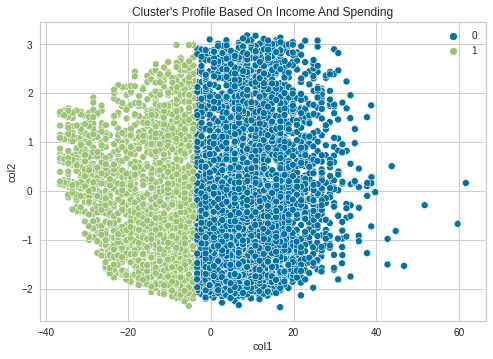

In [ ]:
pl = sns.scatterplot(data = data,x=PCA_ds['col1'], y=PCA_ds['col2'], hue=labels)
pl.set_title("Cluster's Profile Based On Income And Spending")
plt.legend()
plt.show()

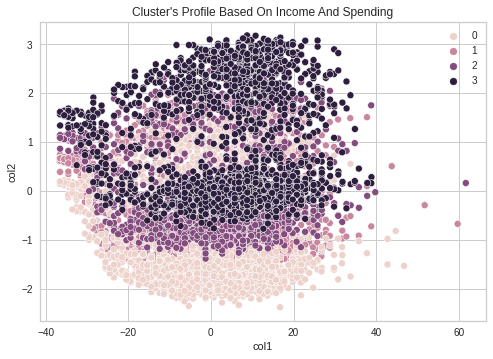

In [ ]:
pl = sns.scatterplot(data = data,x=PCA_ds['col1'], y=PCA_ds['col2'], hue=data['group'])
pl.set_title("Cluster's Profile Based On Income And Spending")
plt.legend()
plt.show()

In [ ]:
plot_clusters(data, labels=labels, centroids=centroids, int_method="quantity")

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning:

X does not have valid feature names, but PCA was fitted with feature names

/usr/local/lib/python3.7/dist-packages/plotly/tools.py:465: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead




 Cluster 0 - 4081

group: [3, 0, 1, 2] - [1349 1053 1025  654]
interest1: [0.0, 1.0] - [3266  815]
interest2: [0.0, 1.0] - [4080    1]
interest3: [0.0, 1.0] - [4049   32]
interest4: [0.0, 1.0] - [4056   25]
interest5: [0.0, 1.0] - [3332  749]
interest6: [1.0, 0.0] - [3058 1023]
interest7: [0.0, 1.0] - [4080    1]
interest8: [0.0, 1.0] - [3990   91]
interest9: [0.0, 1.0] - [3761  320]
interest10: [0.0, 1.0] - [4080    1]
interest11: [0.0, 1.0] - [3913  168]
interest12: [1.0, 0.0] - [3182  899]
interest13: [0.0, 1.0] - [4063   18]
interest14: [0.0, 1.0] - [3758  323]
interest15: [0.0, 1.0] - [2448 1633]
interest16: [1.0, 0.0] - [3155  926]
interest17: [0.0, 1.0] - [3768  313]
interest18: [0.0, 1.0] - [4079    2]
interest19: [0.0, 1.0] - [3942  139]
interest20: [0.0, 1.0] - [3935  146]
interest21: [1.0, 0.0] - [3653  428]
interest22: [0.0, 1.0] - [3671  410]
interest23: [0.0, 1.0] - [4031   50]
interest24: [0.0, 1.0] - [4031   50]
interest25: [0.0, 1.0] - [4070   11]
interest26: [0.0, 1.

In [ ]:
data['group'].value_counts()

3    1809
0    1731
1    1725
2    1075
Name: group, dtype: int64

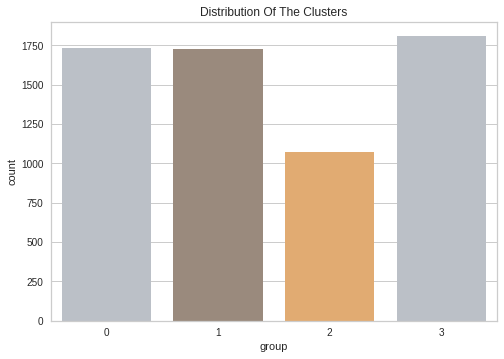

In [ ]:
pal = ["#B9C0C9", "#9F8A78", "#F3AB60"]
pl = sns.countplot(x=data['group'], palette= pal)
pl.set_title("Distribution Of The Clusters")
plt.show()

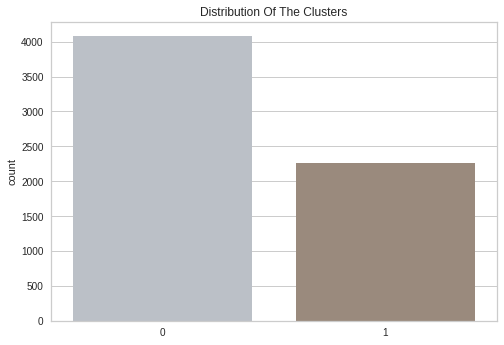

In [ ]:
pal = ["#B9C0C9", "#9F8A78", "#F3AB60"]
pl = sns.countplot(x=labels, palette= pal)
pl.set_title("Distribution Of The Clusters")
plt.show()